In [39]:
import os
os.makedirs("results/exploration", exist_ok=True)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import pandas as pd

In [41]:
dataset_path = r"C:\Users\user\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1"
train_dir = os.path.join(dataset_path, "Training")
test_dir = os.path.join(dataset_path, "Testing")
train_dir, test_dir

('C:\\Users\\user\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1\\Training',
 'C:\\Users\\user\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1\\Testing')

In [42]:
# Fonction pour afficher la structure du dataset
def print_structure(path, indent=0):
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            print("   " * indent + f"[DIR] {item}")
            print_structure(item_path, indent + 1)
        else:
            print("   " * indent + f"[FILE] {item}")

print_structure(dataset_path)


[DIR] Testing
   [DIR] glioma
      [FILE] Te-glTr_0000.jpg
      [FILE] Te-glTr_0001.jpg
      [FILE] Te-glTr_0002.jpg
      [FILE] Te-glTr_0003.jpg
      [FILE] Te-glTr_0004.jpg
      [FILE] Te-glTr_0005.jpg
      [FILE] Te-glTr_0006.jpg
      [FILE] Te-glTr_0007.jpg
      [FILE] Te-glTr_0008.jpg
      [FILE] Te-glTr_0009.jpg
      [FILE] Te-gl_0010.jpg
      [FILE] Te-gl_0011.jpg
      [FILE] Te-gl_0012.jpg
      [FILE] Te-gl_0013.jpg
      [FILE] Te-gl_0014.jpg
      [FILE] Te-gl_0015.jpg
      [FILE] Te-gl_0016.jpg
      [FILE] Te-gl_0017.jpg
      [FILE] Te-gl_0018.jpg
      [FILE] Te-gl_0019.jpg
      [FILE] Te-gl_0020.jpg
      [FILE] Te-gl_0021.jpg
      [FILE] Te-gl_0022.jpg
      [FILE] Te-gl_0023.jpg
      [FILE] Te-gl_0024.jpg
      [FILE] Te-gl_0025.jpg
      [FILE] Te-gl_0026.jpg
      [FILE] Te-gl_0027.jpg
      [FILE] Te-gl_0028.jpg
      [FILE] Te-gl_0029.jpg
      [FILE] Te-gl_0030.jpg
      [FILE] Te-gl_0031.jpg
      [FILE] Te-gl_0032.jpg
      [FILE] Te-gl_0033.jp

In [43]:
# Récupérer les classes
classes = sorted(os.listdir(train_dir))
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [44]:
# Compter les images par classe
def count_images(base_path):
    count_dict = {}
    for cls in classes:
        folder = os.path.join(base_path, cls)
        count_dict[cls] = len(os.listdir(folder))
    return count_dict

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

train_counts, test_counts

({'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457},
 {'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300})

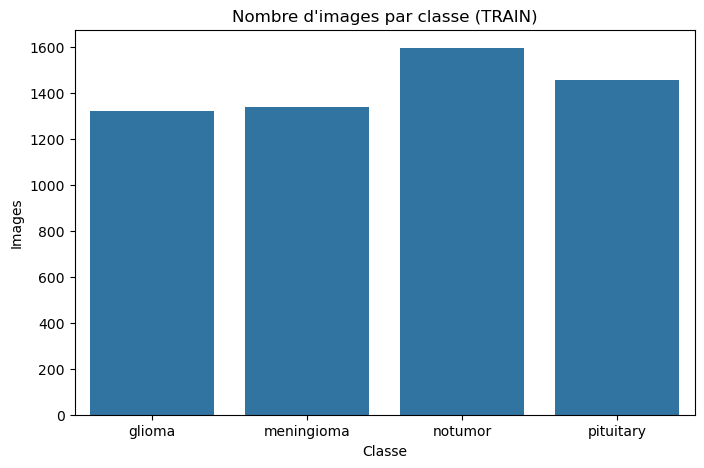

In [45]:
# Affichage graphique : nombre d’images par classe
df_train = pd.DataFrame({
    "Classe": list(train_counts.keys()),
    "Images": list(train_counts.values())
})

plt.figure(figsize=(8,5))
sns.barplot(data=df_train, x="Classe", y="Images")
plt.title("Nombre d'images par classe (TRAIN)")
plt.savefig("results/exploration/train_distribution.png")
plt.show()

In [51]:
df_train

,Classe,Images
0,glioma,1321
1,meningioma,1339
2,notumor,1595
3,pituitary,1457


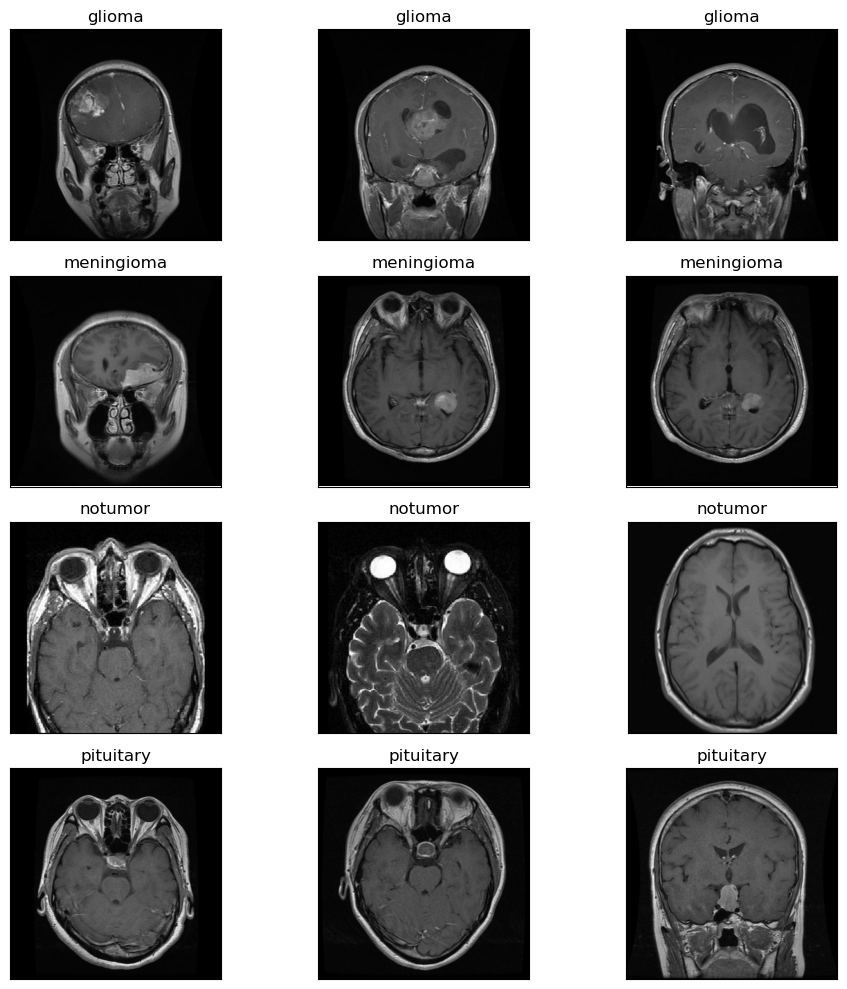

In [46]:
# Affichage de quelques exemples d’images
def show_images(path, n=3):
    plt.figure(figsize=(10, 10))
    for i, cls in enumerate(classes):
        cls_folder = os.path.join(path, cls)
        images = os.listdir(cls_folder)[:n]
        for j, img_name in enumerate(images):
            img_path = os.path.join(cls_folder, img_name)
            img = Image.open(img_path)

            plt.subplot(len(classes), n, i*n + j + 1)
            plt.imshow(img, cmap="gray")
            plt.xticks([])
            plt.yticks([])
            plt.title(cls)

    plt.tight_layout()
    plt.savefig("results/exploration/sample_images.png")
    plt.show()

show_images(train_dir, n=3)

In [47]:
# Vérifier tailles des images
def get_img_size(folder):
    sizes = []
    for cls in classes:
        cls_path = os.path.join(folder, cls)
        for img_name in os.listdir(cls_path)[:100]:  # limiter pour aller vite
            img = Image.open(os.path.join(cls_path, img_name))
            sizes.append(img.size)
    return sizes

sizes = get_img_size(train_dir)

df_sizes = pd.DataFrame(sizes, columns=["width", "height"])
df_sizes.head()

,width,height
0,512,512
1,512,512
2,512,512
3,512,512
4,512,512


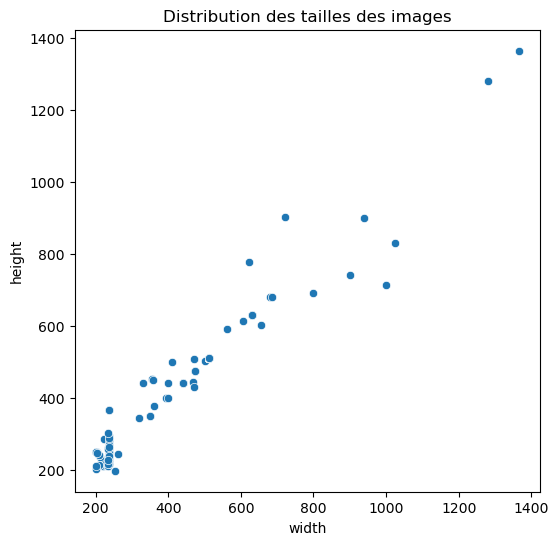

In [48]:
# Distribution des tailles
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_sizes, x="width", y="height")
plt.title("Distribution des tailles des images")
plt.savefig("results/exploration/image_sizes.png")
plt.show()


In [49]:
# Résumé du dataset
print("Résumé du dataset :\n")
print("Classes :", classes)
print("Nombre total d'images train :", sum(train_counts.values()))
print("Nombre total d'images test :", sum(test_counts.values()))
print("Exemple de tailles (100 premières images) :")
df_sizes.describe()

Résumé du dataset :

Classes : ['glioma', 'meningioma', 'notumor', 'pituitary']
Nombre total d'images train : 5712
Nombre total d'images test : 1311
Exemple de tailles (100 premières images) :


,width,height
count,400.000000,400.000000
mean,474.580000,476.772500
std,137.678856,129.670764
min,201.000000,198.000000
25%,512.000000,512.000000
50%,512.000000,512.000000
75%,512.000000,512.000000
max,1365.000000,1365.000000


In [50]:
# Sauvegarder un tableau résumé
summary = pd.DataFrame({
    "Classe": classes,
    "Train": [train_counts[c] for c in classes],
    "Test": [test_counts[c] for c in classes]
})

summary.to_csv("results/exploration/dataset_summary.csv", index=False)
summary

,Classe,Train,Test
0,glioma,1321,300
1,meningioma,1339,306
2,notumor,1595,405
3,pituitary,1457,300


In [ ]:
# Fonction pour compter les modes d'images
def count_image_modes(folder_path):
    rgb_count = 0
    grayscale_count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                if img.mode == "RGB":
                    rgb_count += 1
                elif img.mode == "L":
                    grayscale_count += 1
    return rgb_count, grayscale_count

# Comptage pour Training
train_rgb, train_gray = count_image_modes(train_dir)
print(f"Training → RGB: {train_rgb}, Niveaux de gris: {train_gray}")

# Comptage pour Testing
test_rgb, test_gray = count_image_modes(test_dir)
print(f"Testing → RGB: {test_rgb}, Niveaux de gris: {test_gray}")


Training → RGB: 3236, Niveaux de gris: 2472
Testing → RGB: 690, Niveaux de gris: 621
